### Objective

Detecting presence of heart disease among patients.

### Inspiration

Project inspired by UCI Center for Machine Learning and Intelligent Systems

### Citation
http://archive.ics.uci.edu/ml/datasets.html

### Data Dictionary

Complete attribute documentation:

      1 age: age in years
      2 sex: sex (1 = male; 0 = female)
      3 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
      4 trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
      5 chol: serum cholestoral in mg/dl
      6 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
      7 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
      8 thalach: maximum heart rate achieved
      9 exang: exercise induced angina (1 = yes; 0 = no)
     10 oldpeak = ST depression induced by exercise relative to rest
     11 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     12 ca: number of major vessels (0-3) colored by flourosopy
     13 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     14 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0 (0): < 50% diameter narrowing
        -- Value 1 (1 to 4): > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

### Phase 1 : Import required libraries and datasets and write user-defined functions

In [1]:
#Import required libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from IPython.display import display_html

In [3]:
def print_shape(obj):
    
    '''
    
    Function to print dimension(s) of object
    
    '''
    
    if isinstance(obj, list):
        print('Length of list is : ', len(obj))
    else:
        print('Shape of dataframe is : ', obj.shape)

In [4]:
def print_missing(df):
    
    '''
    
    Function to print missing value and missing percentage of each column of dataframe
    
    '''
    
    miss_val = pd.DataFrame(df.isnull().sum()).reset_index()
    miss_val.columns = ['Column', 'Missing']
    
    miss_perc = pd.DataFrame(df.isnull().sum()/df.shape[0]).reset_index()
    miss_perc.columns = ['Column', 'Missing%']
    
    print_side_by_side(miss_val, miss_perc)

In [5]:
def print_side_by_side(*args):
    
    '''
    
    Function to print pandas dataframes side  by side
    
    '''
    
    html_str=''
    
    for df in args:
        html_str+=df.to_html()
    
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [6]:
def print_dist(df, col, opt):
    
    '''
    
    Function to print distribution of a variable
    
    '''
    
    print('Distribution :\n')
        
    if(opt == 'num'):
        print(df[col].describe)
        
    elif(opt == 'cat'):
        print(df[col].value_counts([0]))
    
    else:
        print('Wrong option!')
        

In [7]:
#Set the column names as there are no headers in the csv file
colnames = ['age', 
            'sex', 
            'cp', 
            'trestbps', 
            'chol', 
            'fbs', 
            'restecg', 
            'thalach', 
            'exang', 
            'oldpeak', 
            'slope', 
            'ca', 
            'thal', 
            'num']

In [8]:
#Read the csv file
df = pd.read_csv('../data/raw/processed.cleveland.data', header=None, names=colnames, na_values=[-9.0, np.nan, '?'])

In [9]:
#Print distribution of target variable
print_dist(df, 'num', 'cat')

Distribution :

0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: num, dtype: float64


### Phase 2 : Data Manipulation

#### Part A : Missing value treatment

In [10]:
#Print missing values and percentage of missing
print_missing(df)

,Column,Missing
0,age,0
1,sex,0
2,cp,0
3,trestbps,0
4,chol,0
5,fbs,0
6,restecg,0
7,thalach,0
8,exang,0
9,oldpeak,0


Since number of missing values is very less, we shall be dropping them.

In [11]:
#Drop missing values
df = df.dropna()

Sanity check if missing values have been removed : 

In [12]:
#Print missing values and percentage of missing
print_missing(df)

,Column,Missing
0,age,0
1,sex,0
2,cp,0
3,trestbps,0
4,chol,0
5,fbs,0
6,restecg,0
7,thalach,0
8,exang,0
9,oldpeak,0


In [13]:
#Print distribution of target variable
print_dist(df, 'num', 'cat')

Distribution :

0    0.538721
1    0.181818
3    0.117845
2    0.117845
4    0.043771
Name: num, dtype: float64


#### Part B : Change the target variable

As mentioned in the data dictionary, the **num** field contains 0-4 values where 0 indicates no presence of heart disease and the rest indicates presence of heart disease. Let us alter this field to reflect the same.

In [14]:
#Change 1-4 to 1 to reflect presence of heart disease
mask = df['num'] > 0
df.loc[mask, 'num'] = 1

In [15]:
#Print distribution of target variable
print_dist(df, 'num', 'cat')

Distribution :

0    0.538721
1    0.461279
Name: num, dtype: float64


#### Part C : Change appropriate columns to integer 

In [16]:
#Specify columns to convert to integer
convert_cols = ['sex', 'fbs', 'exang']
df[convert_cols] = df[convert_cols].apply(lambda x: x.astype('int64', axis=1))

#### Part D : Change appropriate columns to string

In [17]:
#Specify columns to convert to string
convert_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
df[convert_cols] = df[convert_cols].apply(lambda x: x.astype('str'), axis=1)

### Phase 3 : Data Visualization

We have already made a dashboard which can be accessed at:

http://localhost:8888/notebooks/heart_disease_prediction/notebooks/data_visualization.ipynb?dashboard#

We have also made a report of this and uploaded it [here](http://localhost:8888/tree/heart_disease_prediction/reports/data_visualization.pdf).


### Phase 4 : Master Data Preparation

The columns which we shall dummify are :
+ cp
+ restecg
+ slope
+ ca
+ thal

#### Part A : Dummify required columns

In [18]:
#Specify columns to dummify and dummify it
dummify_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
df = pd.get_dummies(df, dummify_cols, drop_first=True)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,1,145.0,233.0,1,150.0,0,2.3,0,0,...,0,0,1,0,1,0,0,0,1,0
1,67.0,1,160.0,286.0,0,108.0,1,1.5,1,0,...,1,0,1,1,0,0,0,1,0,0
2,67.0,1,120.0,229.0,0,129.0,1,2.6,1,0,...,1,0,1,1,0,0,1,0,0,1
3,37.0,1,130.0,250.0,0,187.0,0,3.5,0,0,...,0,0,0,0,1,0,0,0,0,0
4,41.0,0,130.0,204.0,0,172.0,0,1.4,0,1,...,0,0,1,0,0,0,0,0,0,0


In [19]:
#Print shape of dataframe
print_shape(df)

Shape of dataframe is :  (297, 21)


#### Part B : Train/Test split

In [20]:
#Specify target variable and features
master = df.copy()
y = master['num']
X = master.copy().drop(['num'], axis=1)

In [21]:
#Make train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
#Print dimensions of train and test
print_shape(X_train)
print_shape(y_train)

print_shape(X_test)
print_shape(y_test)

Shape of dataframe is :  (207, 20)
Shape of dataframe is :  (207,)
Shape of dataframe is :  (90, 20)
Shape of dataframe is :  (90,)


In [23]:
#Print head of train
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
270,61.0,1,140.0,207.0,0,138.0,1,1.9,0,0,1,0,1,0,0,1,0,0,0,1
37,57.0,1,150.0,276.0,0,112.0,1,0.6,0,0,1,0,1,1,0,1,0,0,1,0
16,48.0,1,110.0,229.0,0,168.0,0,1.0,1,0,0,0,0,0,1,0,0,0,0,1
256,67.0,0,106.0,223.0,0,142.0,0,0.3,0,0,1,0,0,0,0,0,1,0,0,0
145,47.0,1,108.0,243.0,0,152.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
#Print head of test
X_test.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
169,45.0,0,112.0,160.0,0,138.0,0,0.0,1,0,0,0,0,1,0,0,0,0,0,0
214,52.0,1,112.0,230.0,0,160.0,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0
63,54.0,0,135.0,304.0,1,170.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0
155,70.0,1,130.0,322.0,0,109.0,0,2.4,0,0,1,0,1,1,0,0,0,1,0,0
5,56.0,1,120.0,236.0,0,178.0,0,0.8,1,0,0,0,0,0,0,0,0,0,0,0


#### Part C : Scale features

We shall be scaling features which require scaling.

In [25]:
#Scale features for numerical variables
scale_features = ['age', 
                  'trestbps', 
                  'chol', 
                  'thalach', 
                  'oldpeak']
scaler = StandardScaler()

In [26]:
#Work with a copy and separate target variable and features
master = df.copy()
y = master['num']
X = master.copy().drop(['num'], axis=1)

In [27]:
#Work with only columns which need to be scaled
X_train_scaled = X_train.copy()[scale_features]
X_test_scaled = X_test.copy()[scale_features]

In [28]:
#Scale the columns and rename them appropriately
scale_col_names = [('scaled_'+i) for i in scale_features]
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_scaled), columns=scale_col_names)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_scaled), columns=scale_col_names)

In [29]:
#Concatenate with original train
X_train_scaled.index = X_train.index
X_train_base = pd.concat([X_train.copy().drop(scale_features, axis=1), X_train_scaled], axis=1)

In [30]:
#Concatenate with original test
X_test_scaled.index = X_test.index
X_test_base = pd.concat([X_test.copy().drop(scale_features, axis=1), X_test_scaled], axis=1)

In [31]:
#Print shape of new dataframes
print_shape(X_train_base)
print_shape(X_test_base)

Shape of dataframe is :  (207, 20)
Shape of dataframe is :  (90, 20)


In [32]:
#Print head of the new train dataframe
X_train_base.head()

,sex,fbs,exang,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0,scaled_age,scaled_trestbps,scaled_chol,scaled_thalach,scaled_oldpeak
270,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0.728560,0.500301,-0.786293,-0.442406,0.787175
37,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0.283030,1.086392,0.503842,-1.555556,-0.370992
16,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,-0.719412,-1.257973,-0.374946,0.841998,-0.014633
256,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1.396855,-1.492409,-0.487131,-0.271152,-0.638262
145,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.830795,-1.375191,-0.113179,0.156983,-0.905531


In [33]:
#Print head of the new test dataframe
X_test_base.head()

,sex,fbs,exang,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0,scaled_age,scaled_trestbps,scaled_chol,scaled_thalach,scaled_oldpeak
169,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,-1.053560,-1.140755,-1.665081,-0.442406,-0.905531
214,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.273883,-1.140755,-0.356248,0.499491,-0.905531
63,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.051118,0.207255,1.027375,0.927625,-0.905531
155,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1.731002,-0.085790,1.363932,-1.683997,1.232624
5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.171647,-0.671881,-0.244062,1.270133,-0.192813


### Phase 5 : Baseline Model

Let us get an estimate of the baseline accuracy of the model before fine-tuning it. We shall be trying these models: 

+ Logistic Regression
+ Random Forest
+ Gradient Boosting
+ Neural Networks
+ K-Nearest Neighbours
+ Naive Bayes
+ Support Vector Machines

In [34]:
#Select the estimators we want to use
estimators = [('log', LogisticRegression()), 
              ('rfc', RandomForestClassifier()), 
              ('gbm', GradientBoostingClassifier()), 
              ('mlp', MLPClassifier()),
              ('knn', KNeighborsClassifier()), 
              ('nbs', GaussianNB()), 
              ('svm', SVC())]

In [35]:
#Empty lists to record results and declare the scoring metric
results = []
names = []
scoring = 'accuracy'

In [36]:
#Iterate over each model, fit it and see the cross val score
for run in range(5):
    
    print('########################')
    print('Run : ', run + 1)
    print('########################')
    
    for name, estimator in estimators:
        kfold = KFold(n_splits=3)
        cv_results = cross_val_score(estimator, X_train_base, y_train, cv=kfold, scoring=scoring)
        warnings.filterwarnings('ignore', category=ConvergenceWarning)
        results.append(cv_results)
        names.append(name)
        msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    print('########################')

########################
Run :  1
########################
log: 0.801932 (0.024633)
rfc: 0.739130 (0.023667)
gbm: 0.758454 (0.018076)
mlp: 0.797101 (0.042666)
knn: 0.743961 (0.029780)
nbs: 0.739130 (0.059166)
svm: 0.787440 (0.024633)
########################
########################
Run :  2
########################
log: 0.801932 (0.024633)
rfc: 0.743961 (0.047824)
gbm: 0.739130 (0.035500)
mlp: 0.816425 (0.024633)
knn: 0.743961 (0.029780)
nbs: 0.739130 (0.059166)
svm: 0.787440 (0.024633)
########################
########################
Run :  3
########################
log: 0.801932 (0.024633)
rfc: 0.705314 (0.067287)
gbm: 0.739130 (0.042666)
mlp: 0.801932 (0.036151)
knn: 0.743961 (0.029780)
nbs: 0.739130 (0.059166)
svm: 0.787440 (0.024633)
########################
########################
Run :  4
########################
log: 0.801932 (0.024633)
rfc: 0.714976 (0.018076)
gbm: 0.739130 (0.042666)
mlp: 0.797101 (0.020496)
knn: 0.743961 (0.029780)
nbs: 0.739130 (0.059166)
svm: 0.787440 

As you can see the logistic regression model performs consistently better than the rest of the models and hence we shall be using it as our final model.

### Phase 6 : Feature Selection

#### Part A : Corelation Matrix

Let us check if the numeric independent variables have corelation amongst themselves, in which case they should be removed to avoid multicollinearity.

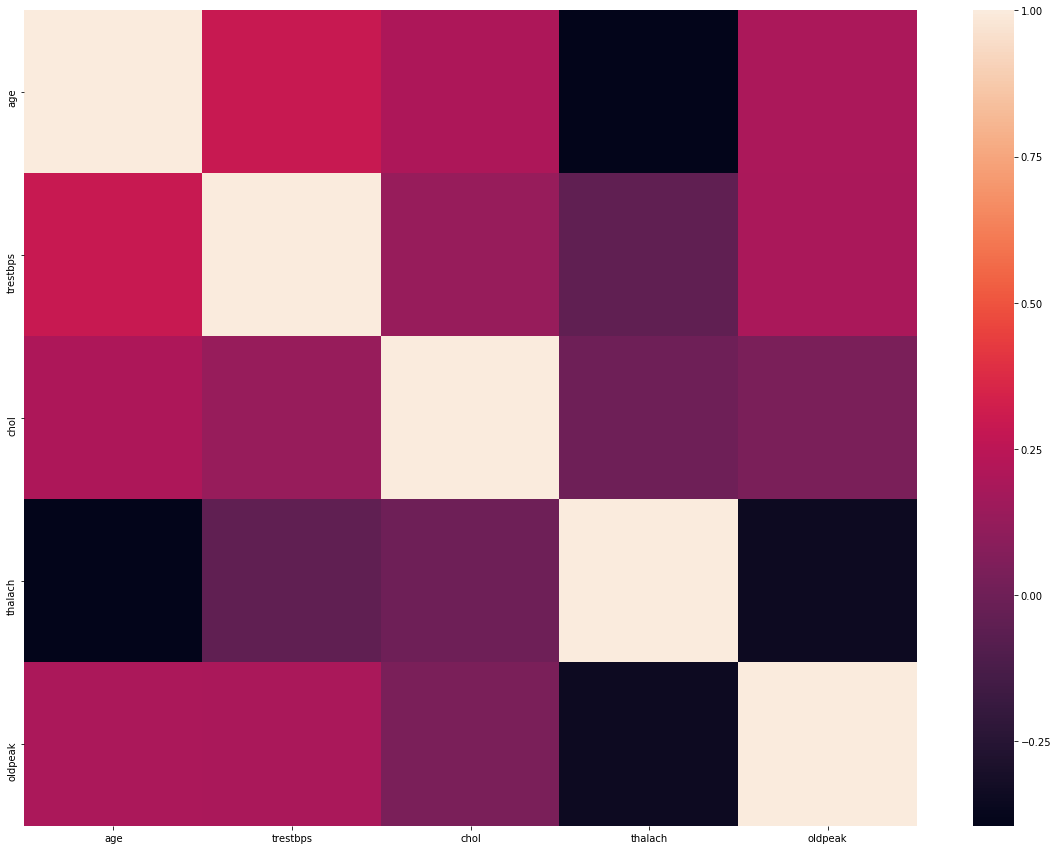

In [37]:
plt.subplots(figsize=(20,15))
corr = df[scale_features].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)